In [1]:
# Titanic data Analysis
#Predict what factors made People more likely to survive the sinking of the Titanic ship

##Collect data and import liabraries
import pandas as pd
import numpy as np
import seaborn as sns #For plotting stastical plotting
import matplotlib.pyplot as plt
%matplotlib inline
import math


In [2]:
titanic_data=pd.read_csv('tested.csv')
titanic_data.head(15)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [4]:
print("Total no of Passenger")
len(titanic_data.index)

Total no of Passenger


418

# Analyzing data


0    266
1    152
Name: Survived, dtype: int64


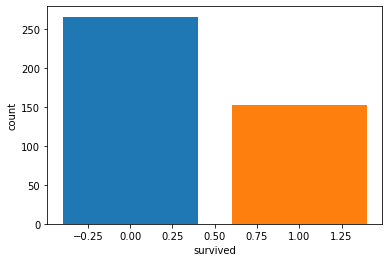

In [5]:
#Account plot to cheeck graph b/w who survived and who not
x=titanic_data['Survived'].value_counts() 
print(x)#count of survived

plt.xlabel('survived')
plt.ylabel('count')
plt.bar(0,x[0])
plt.bar(1,x[1])
plt.show() #Graph b/w the people who have survived and who have not 


<BarContainer object of 4 artists>

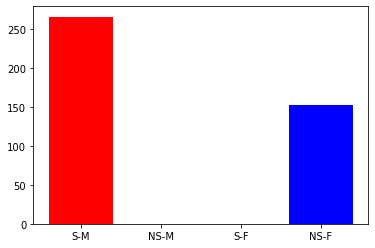

In [6]:
##x=titanic_data['Survived']
#sns.countplot(x="Survived", hue="Sex" ,data=titanic_data)

t1=titanic_data.loc[(titanic_data['Sex']=='male') & (titanic_data['Survived']==0)]
t2=titanic_data.loc[(titanic_data['Sex']=='male') & (titanic_data['Survived']==1)]
t3=titanic_data.loc[(titanic_data['Sex']=='female') & (titanic_data['Survived']==0)]
t4=titanic_data.loc[(titanic_data['Sex']=='female')& (titanic_data['Survived']==1) ]

t1=t1['Survived']
t2=t2['Survived']
t3=t3['Survived']
t4=t4['Survived']
height=[len(t1),len(t2),len(t3),len(t4)]
values=['S-M','NS-M','S-F','NS-F']
#Concludes gender of survival rate
plt.bar(values,height,color=['red','green','yellow','blue'])









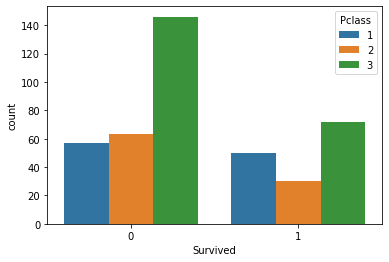

In [7]:
sns.countplot(x="Survived", hue="Pclass" ,data=titanic_data)


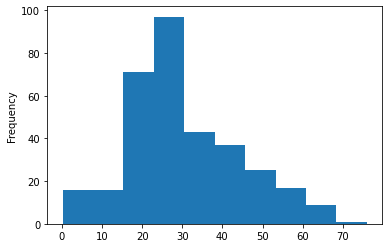

In [9]:
titanic_data["Age"].plot.hist()

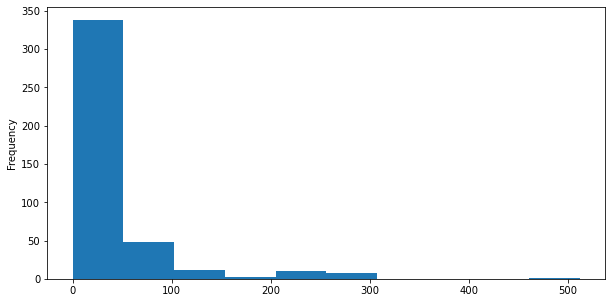

In [10]:
titanic_data['Fare'].plot.hist(figsize=(10,5))

In [11]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


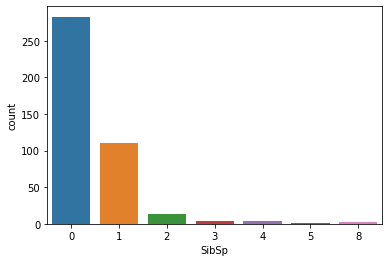

In [12]:
sns.countplot(x="SibSp",data=titanic_data)

# Data Wrangling


In [13]:
#Firstly we will check wether any of data is NULL or not
titanic_data.isnull()  #Checks missing data & gives result in boolean,0(False)=IF NOT NULL & 1(True)=IF NULL



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [14]:
titanic_data.isnull().sum() #no of passengers with NaN value

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
#heatmap=to show user behavior on specific webpages or any phenomena magnitude 

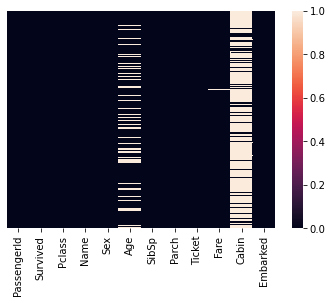

In [17]:
sns.heatmap(titanic_data.isnull(),yticklabels=False) #White stands for NULL

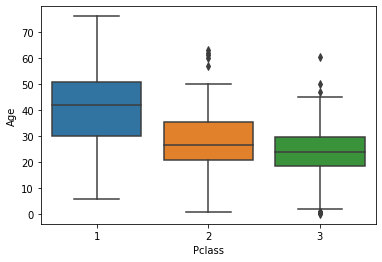

In [18]:
#The seaborn boxplot is a very basic plot Boxplots are used to visualize distributions.
#Thats very useful when you want to compare data between two groups. Sometimes a boxplot
#is named a box-and-whisker plot. Any box shows the quartiles of the dataset while the whiskers
#extend to show the rest of the distribution.

sns.boxplot(x='Pclass',y='Age',data=titanic_data)
# People of older age is more like to travel in class1
#This method is callled imputation
#Imputation is another approach to resolve the problem of missing data


In [26]:
#Data Wrangling
#Since cabin has many NaN values -we will drop it
titanic_data.drop("Cabin",axis=1,inplace=True)


In [27]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [30]:
#Dropping nan values from datase
titanic_data.dropna(inplace=True)

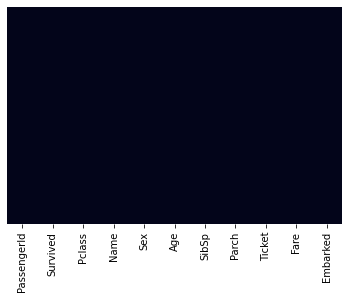

In [32]:
#Now check the heatmap weather all the null value is cleaned from dataset
sns.heatmap(titanic_data.isnull(),yticklabels=False,cbar=False)
#Data set is completely black means data is cleaned

In [33]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [34]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [40]:
#In dataset we have lot of strings value (So it has to be converted into categorical var ,inorder to implement 
#in logistic regression) .we will convert this into categorical var to some dummy var(0,1) as logistic reg 
#take only two value
###########################################################3
#We have to see how many have survived (0-not,1=yes)
#Converting categorical value in dummmy_value(0,1) where 

sex=pd.get_dummies(titanic_data['Sex'],drop_first=True)
#We will be dropping one column (female) as from 1 col only we can get wether m/f
sex.head(5)

,male
0,1
1,0
2,1
3,1
4,0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [42]:
#Embarked:p,q,r ->into dummies
embark=pd.get_dummies(titanic_data['Embarked'],drop_first=True)
print(embark.head(6))

   Q  S
0  1  0
1  0  1
2  1  0
3  0  1
4  0  1
5  0  1


In [50]:
#Pclass-1,2,3=into dummies
Pcl=pd.get_dummies(titanic_data['Pclass'],drop_first=True)
Pcl.head(5)

,1,2,3
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [51]:
#Now since we have converted all this data into categorical,now time to add it to dataset
titanic_data=pd.concat([titanic_data,sex,embark,Pcl],axis=1)

In [52]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,1,2,3
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0,0,0,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1,0,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0,0,1,0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1,0,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1,0,0,1
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S,1,0,1,0,0,1
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q,0,1,0,0,0,1
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,S,1,0,1,0,1,0
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,C,0,0,0,0,0,1
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,S,1,0,1,0,0,1


In [57]:
titanic_data.drop(['Sex','PassengerId','Name','Sex','Embarked','Ticket'],axis=1,inplace=True)

KeyError: "['Sex' 'PassengerId' 'Name' 'Sex' 'Embarked' 'Ticket'] not found in axis"

In [58]:
titanic_data.head(8)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,1,2,3
0,0,3,34.5,0,0,7.8292,1,1,0,0,0,1
1,1,3,47.0,1,0,7.0000,0,0,1,0,0,1
2,0,2,62.0,0,0,9.6875,1,1,0,0,1,0
3,0,3,27.0,0,0,8.6625,1,0,1,0,0,1
4,1,3,22.0,1,1,12.2875,0,0,1,0,0,1
5,0,3,14.0,0,0,9.2250,1,0,1,0,0,1
6,1,3,30.0,0,0,7.6292,0,1,0,0,0,1
7,0,2,26.0,1,1,29.0000,1,0,1,0,1,0


In [59]:
titanic_data.drop(['Pclass'],axis=1,inplace=True)

In [60]:
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,1,2,3
0,0,34.5,0,0,7.8292,1,1,0,0,0,1
1,1,47.0,1,0,7.0000,0,0,1,0,0,1
2,0,62.0,0,0,9.6875,1,1,0,0,1,0
3,0,27.0,0,0,8.6625,1,0,1,0,0,1
4,1,22.0,1,1,12.2875,0,0,1,0,0,1


# Training and testing Data

In [64]:
#By splitting data-train & test
# We will build the model using train data & predict the value using test data
X=titanic_data.drop(['Survived'],axis=1)  #Expect the survived we will take all the features/independt var
y=titanic_data['Survived']  #dependent variable

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split( X, y, test_size=0.3, random_state=1)

In [70]:
from sklearn.linear_model import LogisticRegression


In [72]:
logmodel=LogisticRegression()

In [75]:
logmodel.fit(X_train,y_train)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
predictions=logmodel.predict(X_test)

In [78]:
from sklearn.metrics import classification_report


In [79]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        57\n           1       1.00      1.00      1.00        43\n\n    accuracy                           1.00       100\n   macro avg       1.00      1.00      1.00       100\nweighted avg       1.00      1.00      1.00       100\n'

In [80]:
from sklearn.metrics import confusion_matrix


In [81]:
confusion_matrix(y_test,predictions)  #Tells about /describe performance of a model--(gives 1 :100% accuracy)

array([[57,  0],
       [ 0, 43]], dtype=int64)

In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

1.0

In [ ]:
# Gives 100% accuracy
